In [1]:
from tdata import *
from rd import *
from tqdm import tqdm

/DataDepartment/SensitiveData/config.yaml not found, will load default settings


/miniconda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/DataDepartment/SensitiveData/config.yaml not found, will load default settings


### Load Factor

In [12]:
forward_returns = compute_forward_returns(action="keep",split=True)

In [9]:
data = DataFetch().fetch_data(
    factor_source_data=["open", "close", "high", "low","vwap","volume"], 
    start_date="2015-01-01", end_date="2022-12-31"
)

100%|██████████| 1/1 [00:43<00:00, 43.23s/it]


In [18]:
f = ts_max(np.minimum(data['volume'].abs(),data['close']/data['low']),d = 10)
f = ts_max(data['close']/data['low'],d = 10)

evaluation_f = f.T.sort_index().T

In [19]:
compute_ic(evaluation_f,forward_returns).mean()

1D0930,2D0930    -0.044456
1D0930,6D0930    -0.071292
1D0930,11D0930   -0.082333
dtype: float64

#### Corr in Base

In [21]:
token = cib.upload(evaluation_f)
_result = cib.fetch(token)
_result.mean().abs().sort_values(ascending=False)

alpha_maximum_10day_returns     0.815144
alpha_pricediff_minpct_sma10    0.803217
alpha_std                       0.792027
alpha_gt175                     0.773215
alpha_gt129                     0.762327
                                  ...   
close_div_16_week_high          0.000479
alpha_CDLEVENINGDOJISTAR        0.000374
alpha_pe_ratio_tsrank           0.000312
min_vol_count_peak              0.000218
discrete_skew_min_235           0.000171
Length: 1859, dtype: float64

#### IC & Quantile Return 

Threading[3]: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]


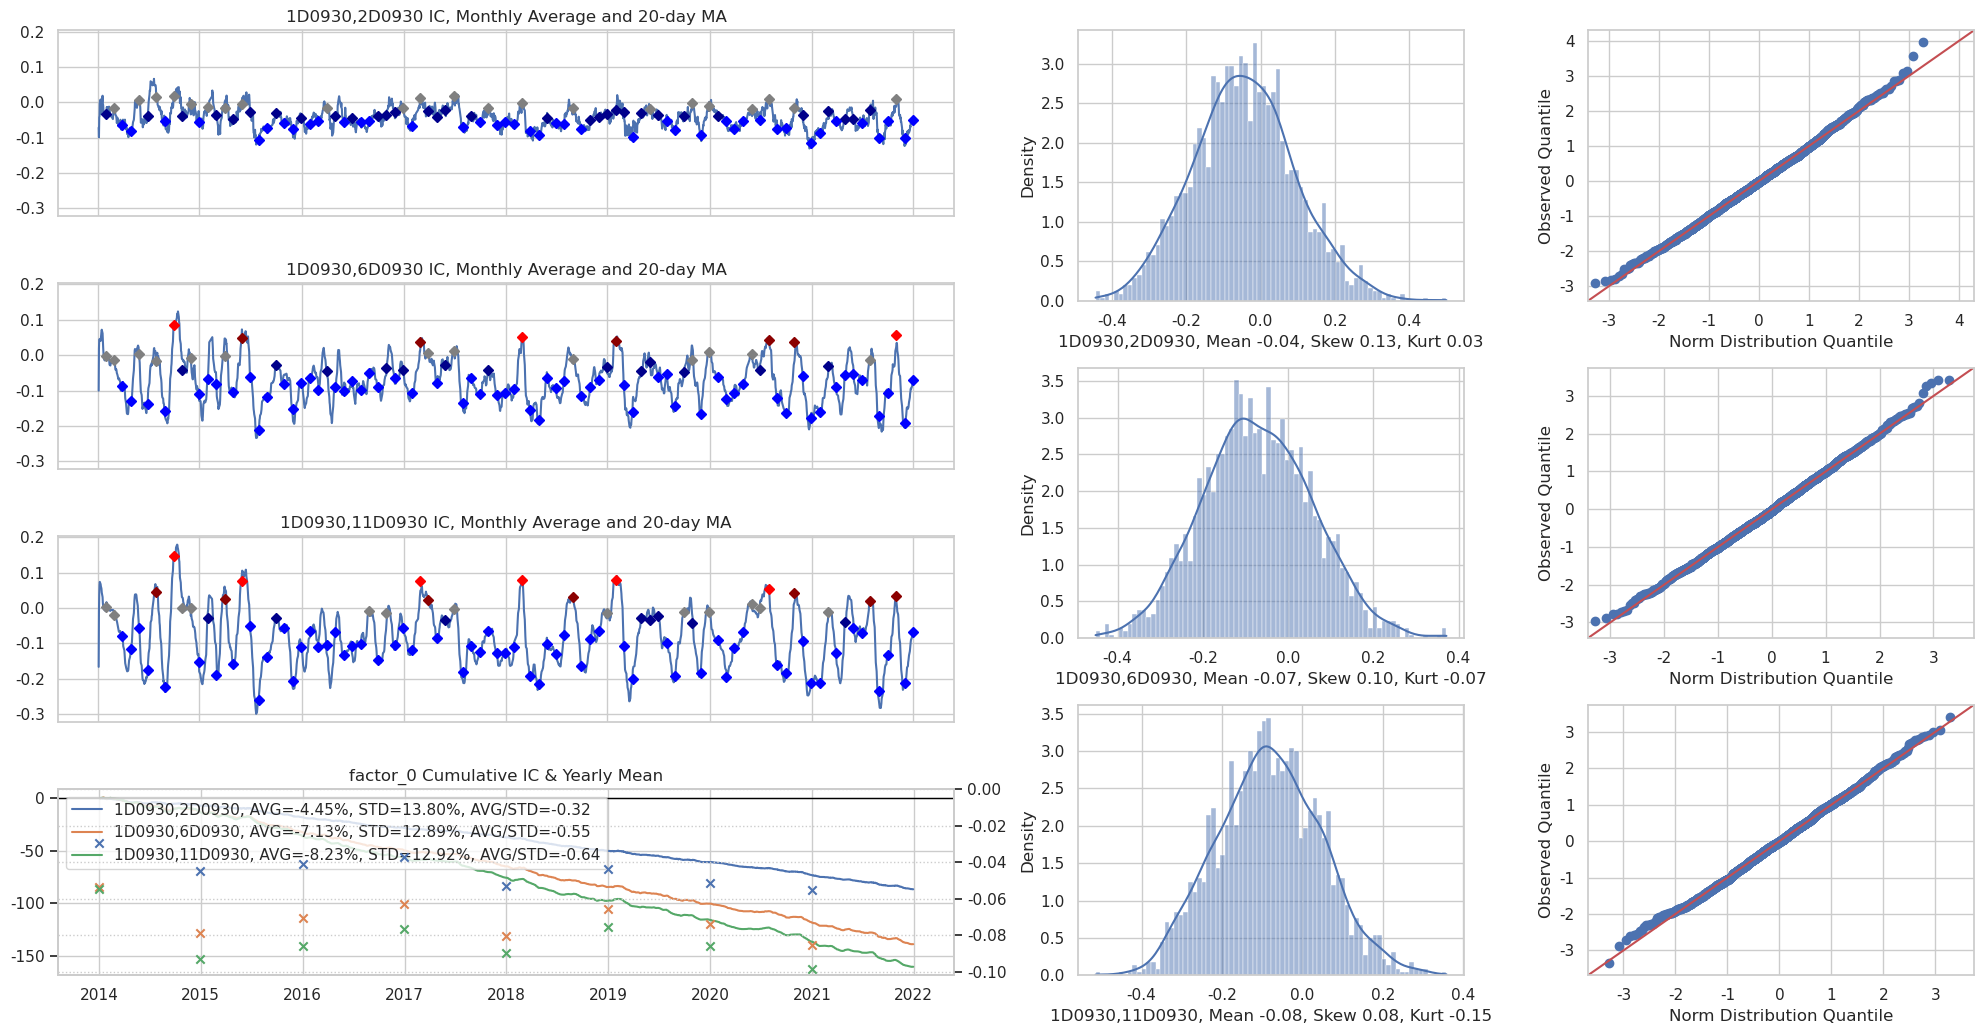

       1D0930,2D0930  1D0930,6D0930  1D0930,11D0930
mean       -0.044456      -0.071292       -0.082333
std         0.138004       0.128874        0.129167
ir         -0.322135      -0.553193       -0.637412
> 0         0.367745       0.289676        0.262455
< 0         0.632255       0.710324        0.737545
> 3%        0.290704       0.220339        0.202363
< -3%       0.548023       0.628146        0.657422
> 5%        0.235234       0.173600        0.154083
< -5%       0.489985       0.564458        0.600411


Threading[3] quantile turnover: 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


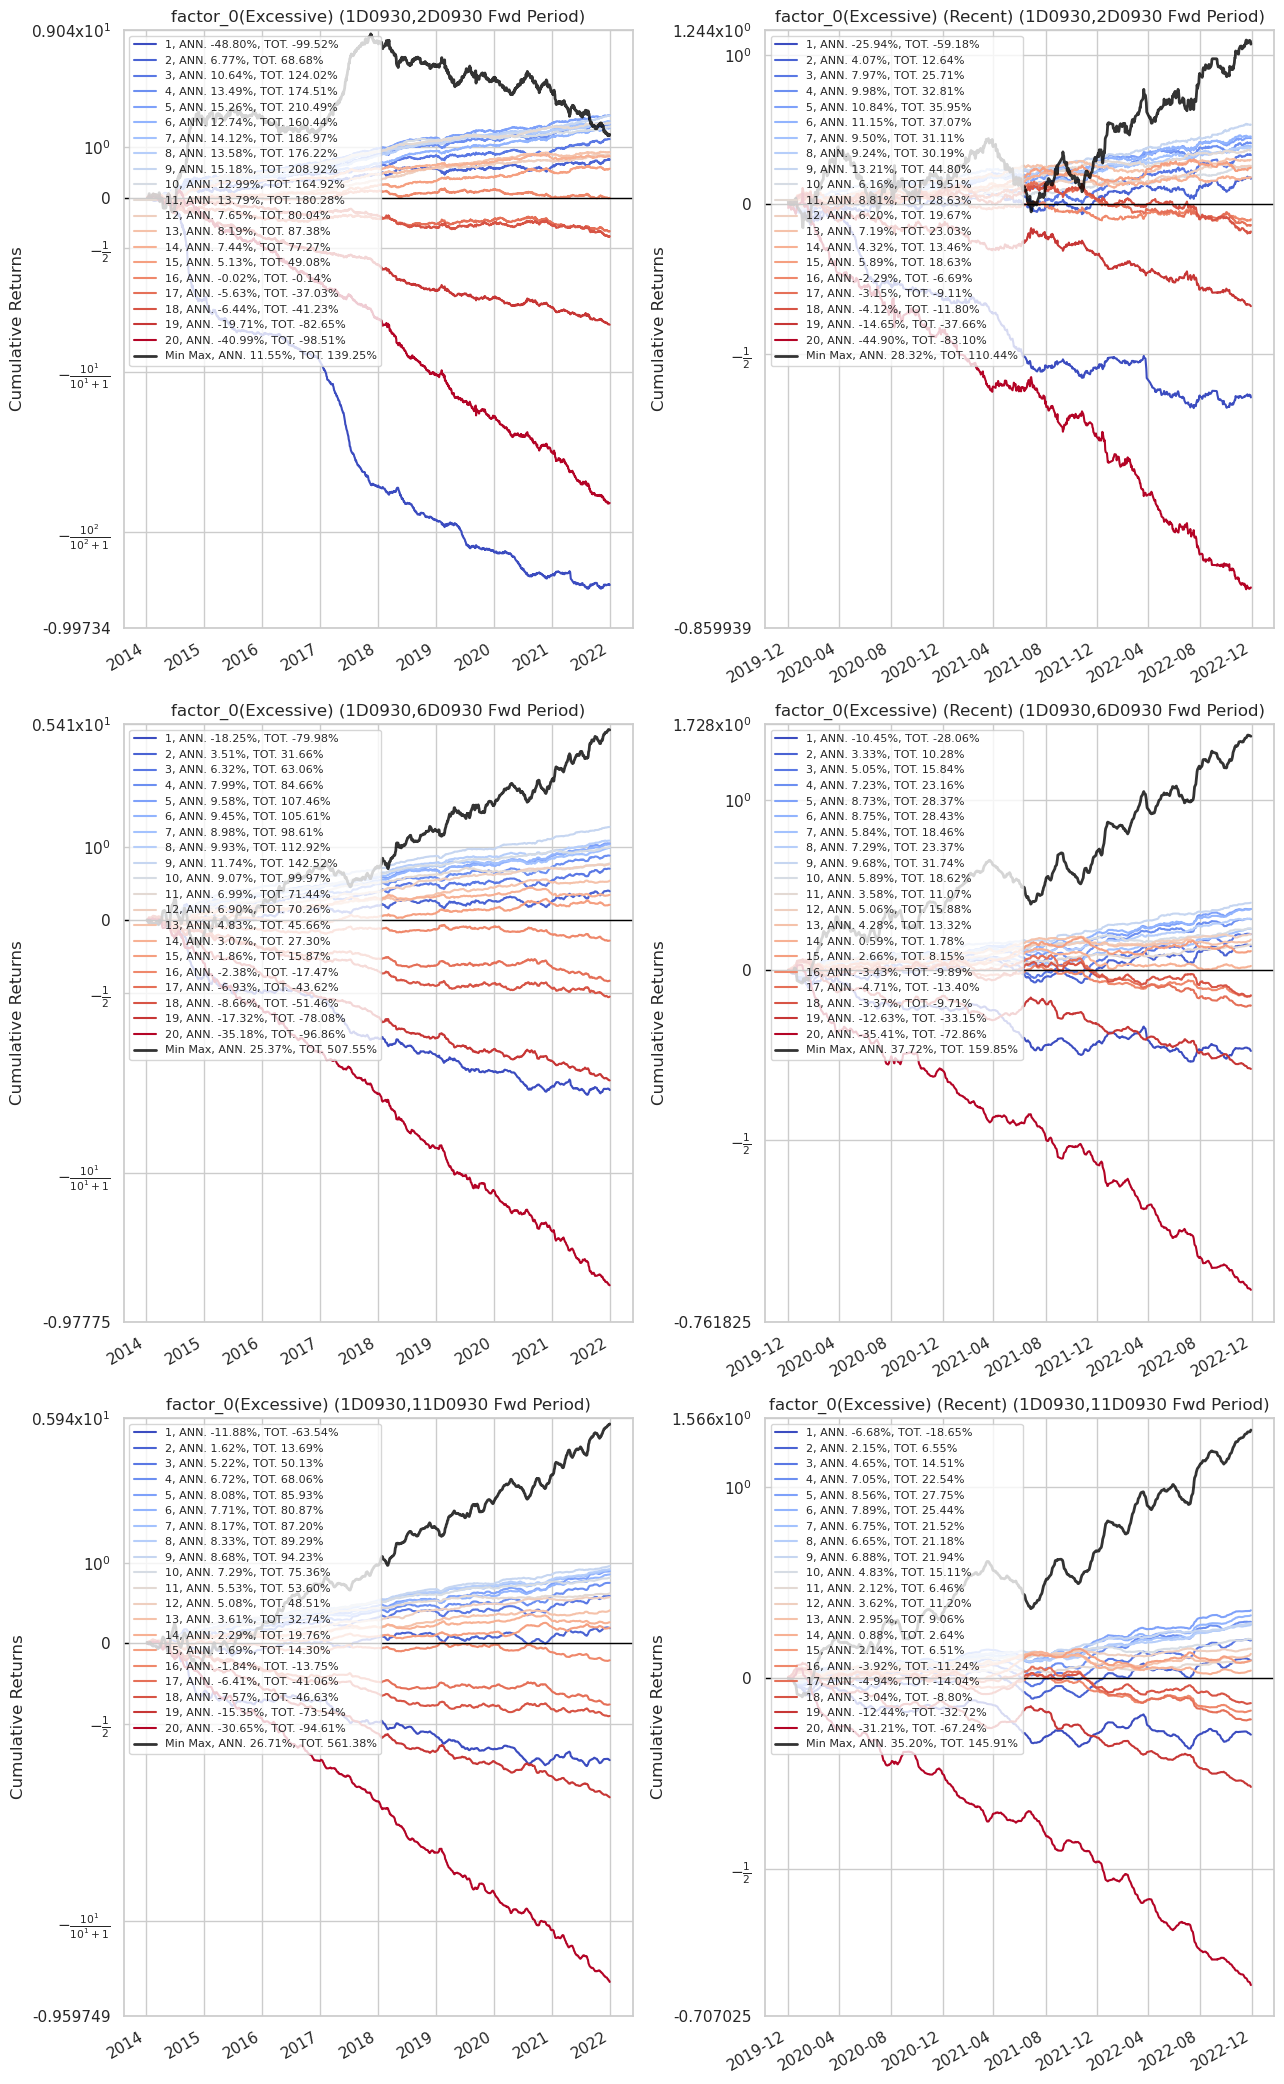

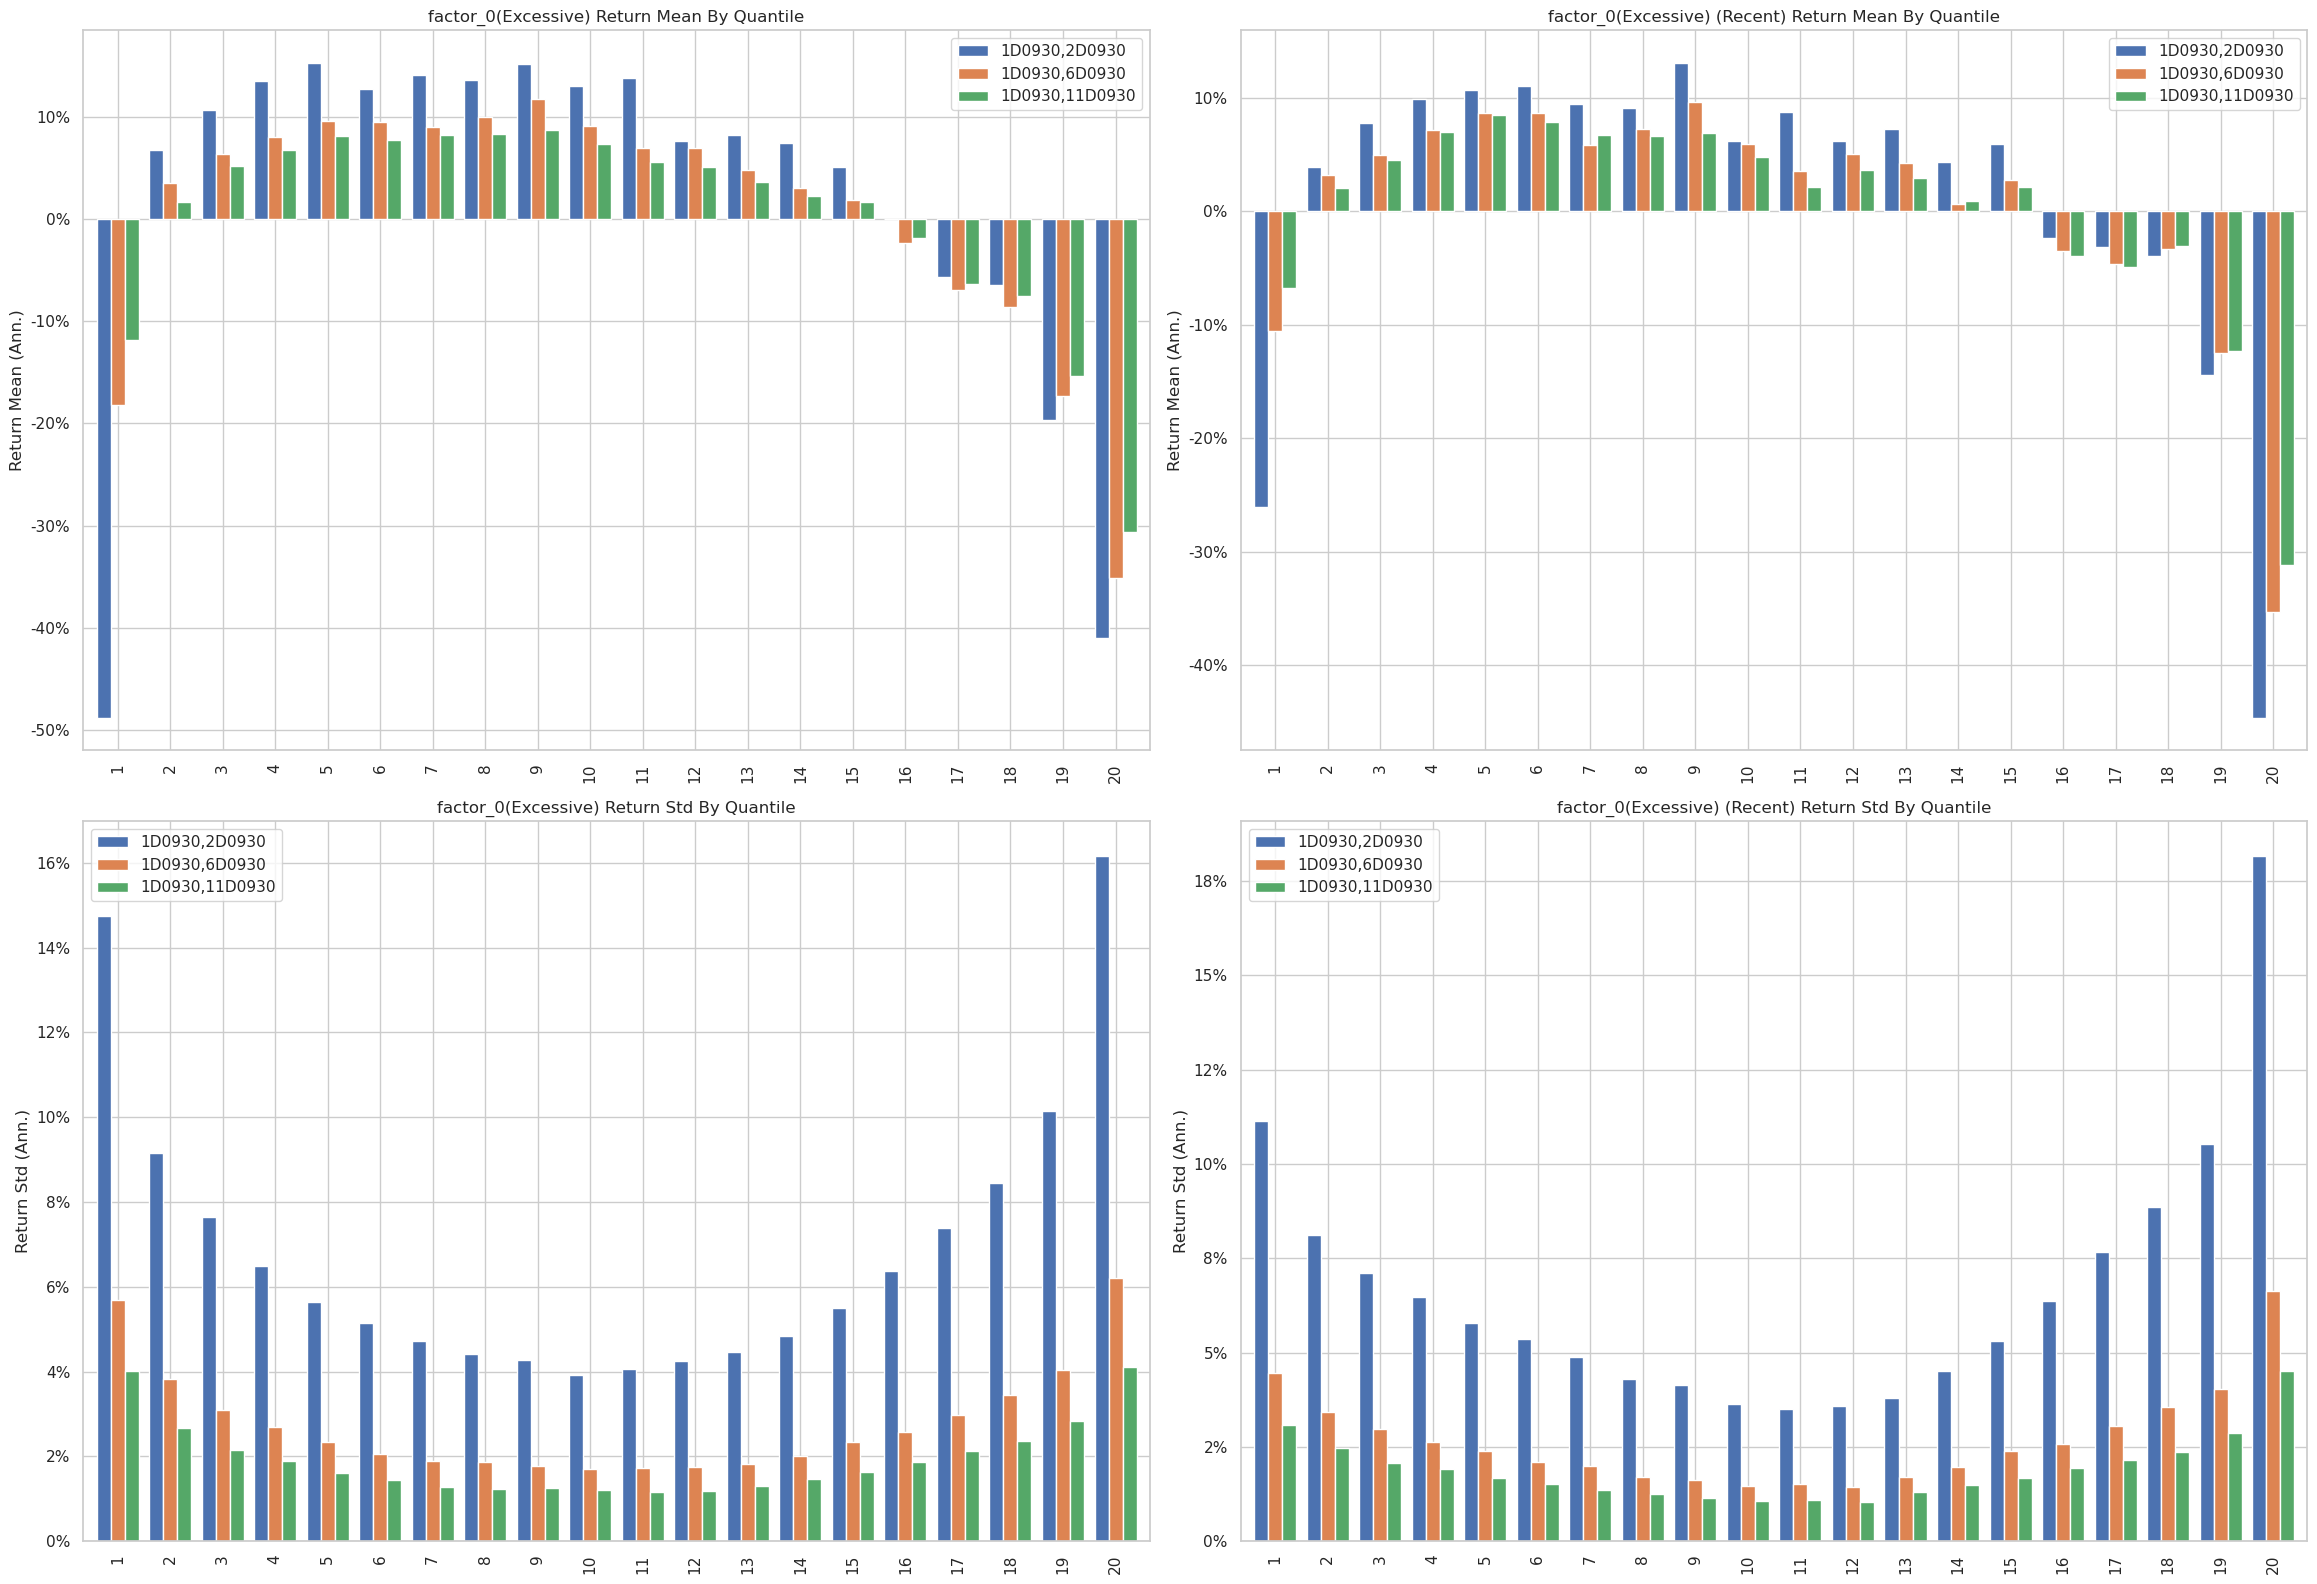

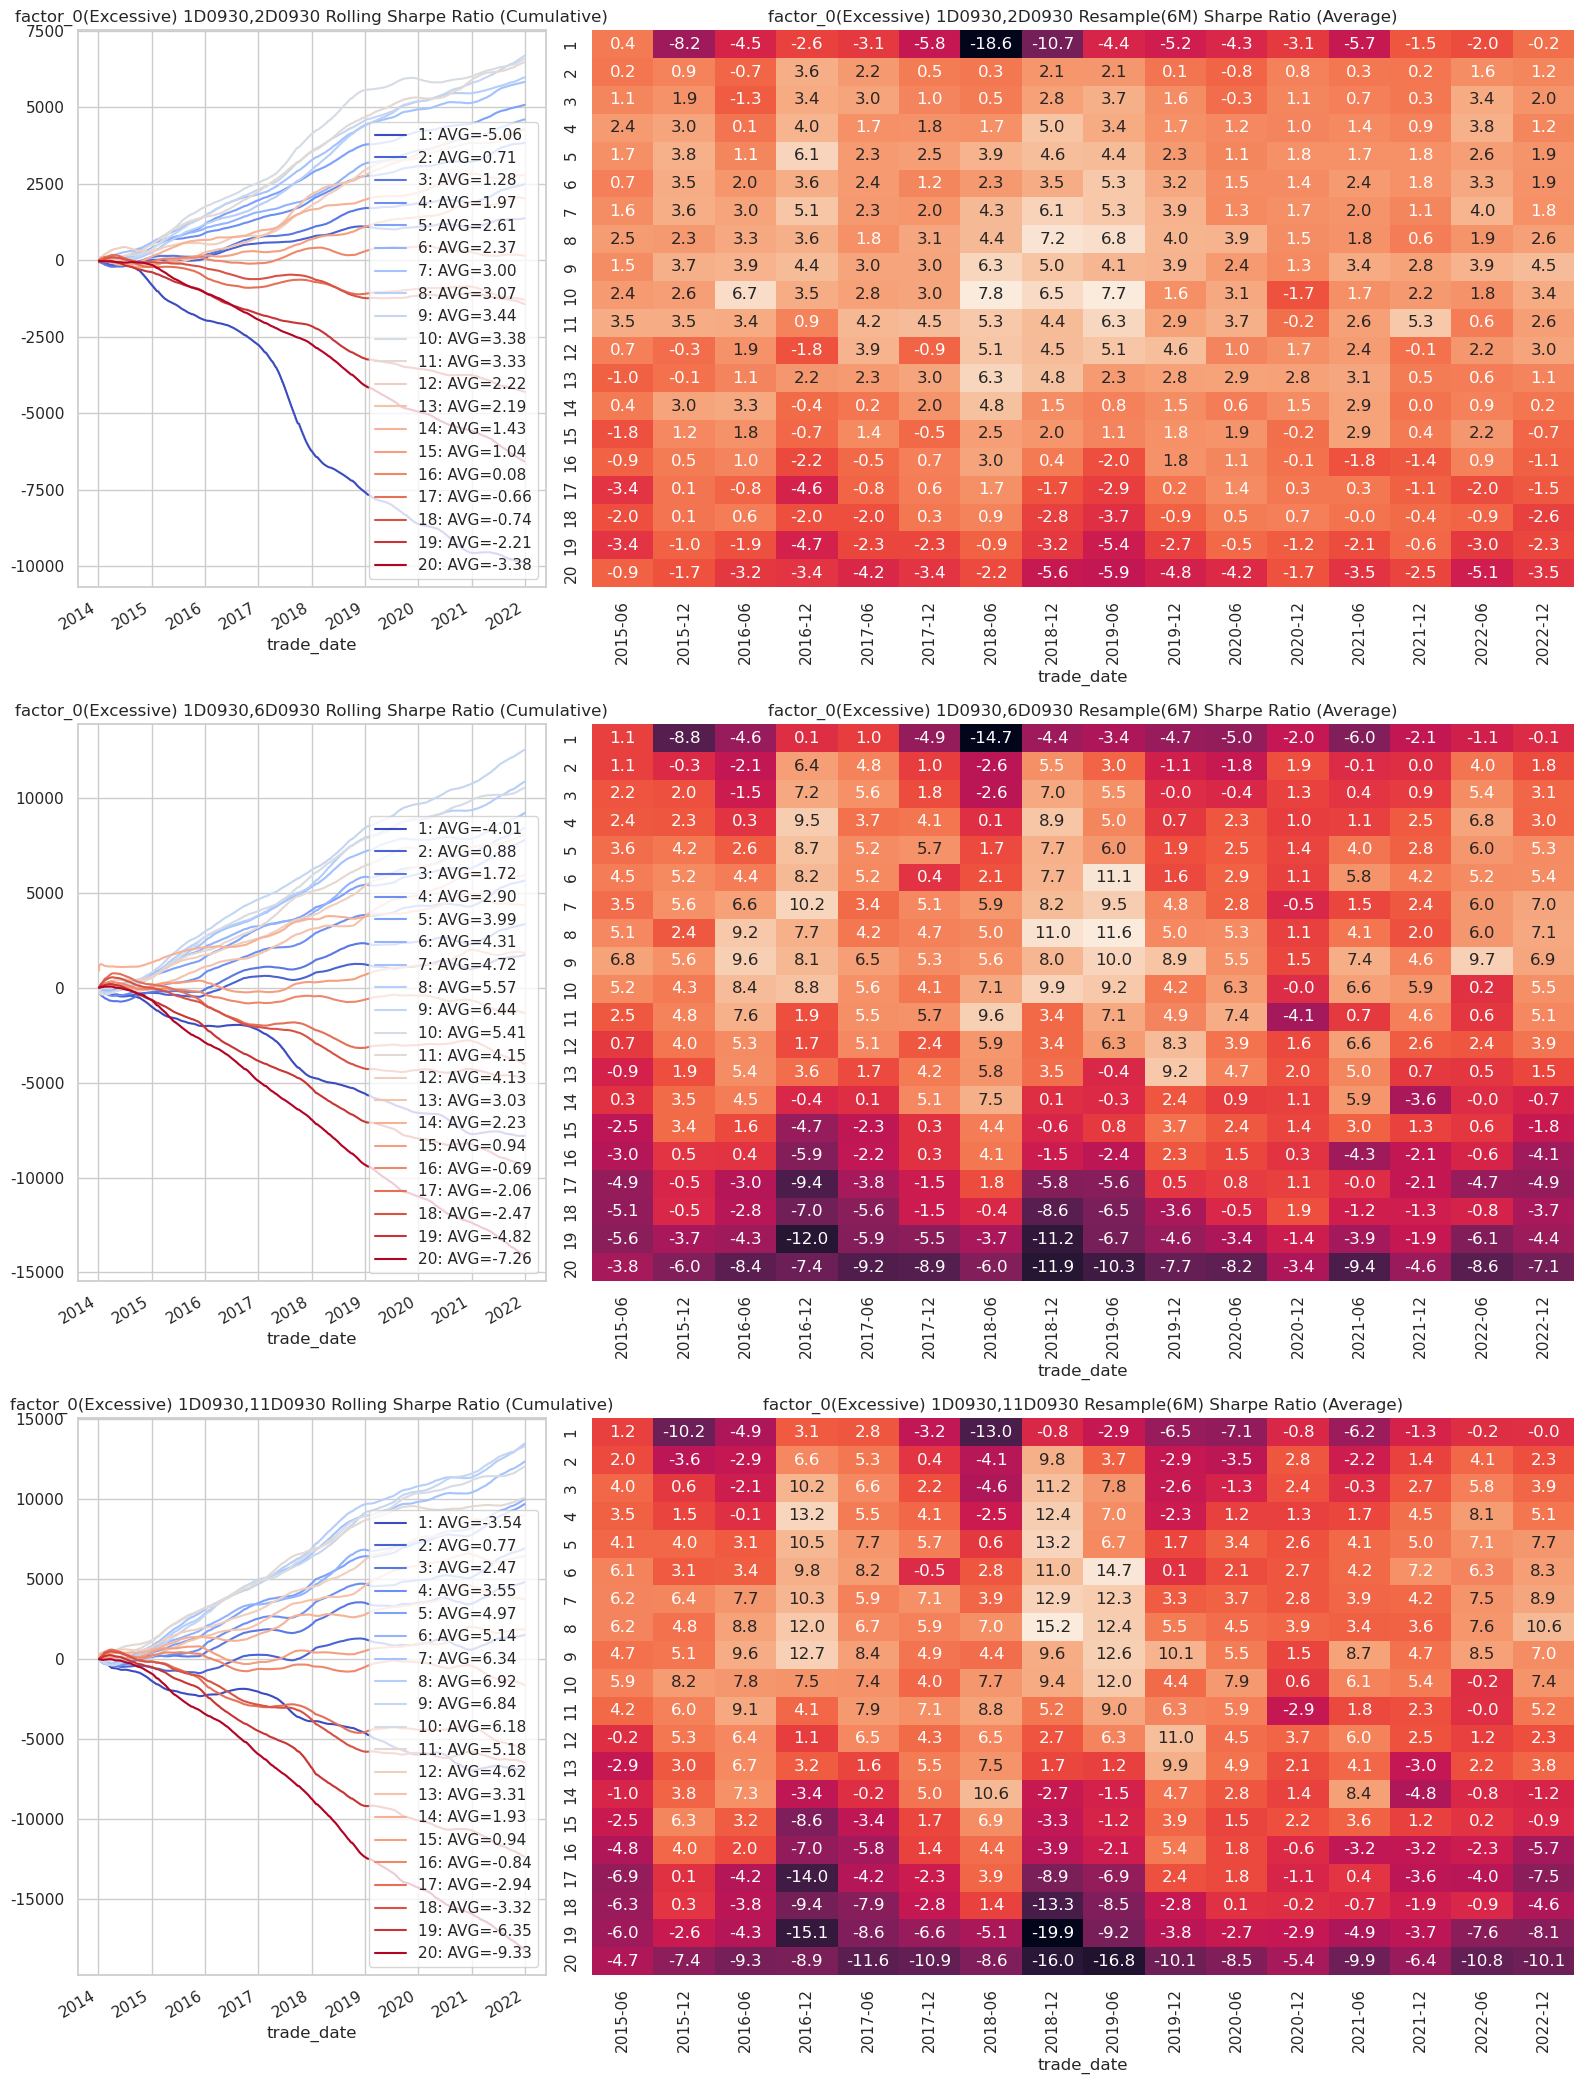

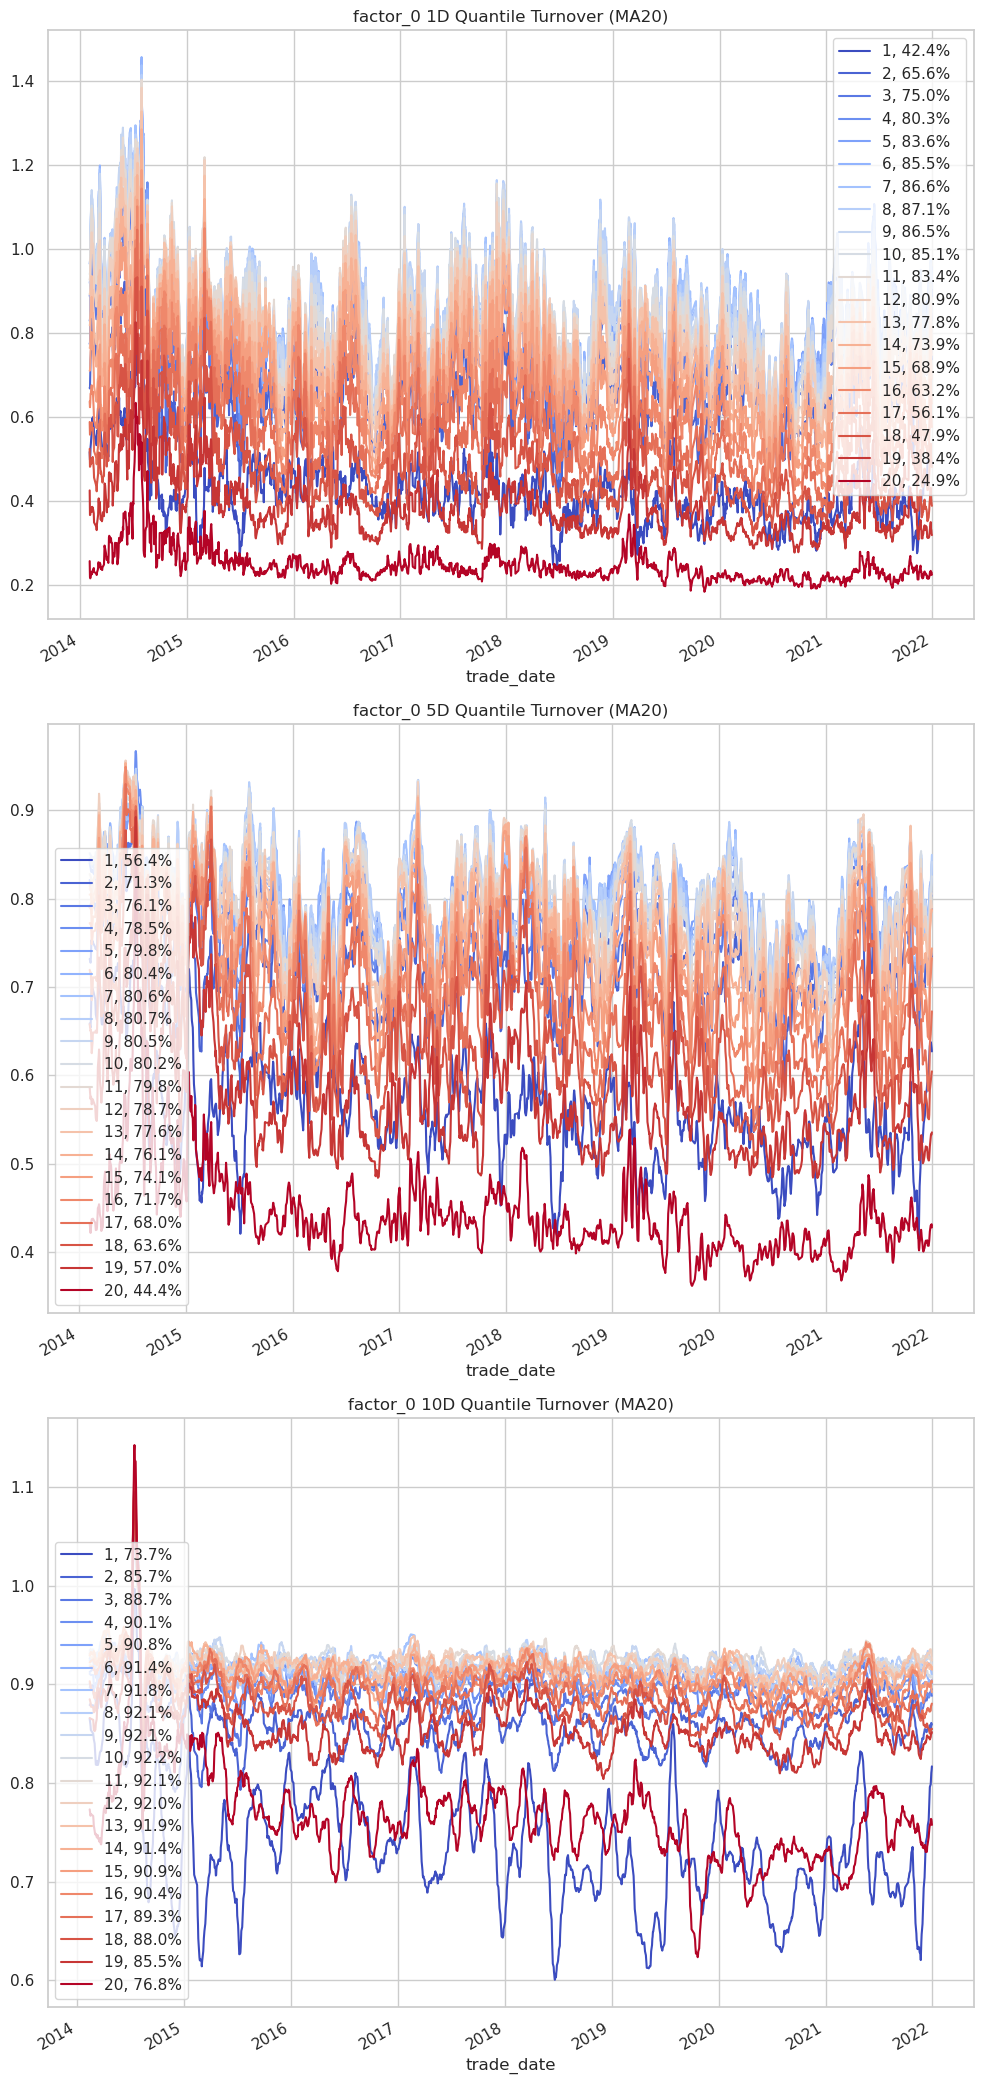

In [20]:
mng = FactorEvaManager(evaluation_f, forward_returns)
ic = mng.get_ic()
qt = mng.get_quantile_returns(quantiles = 20)

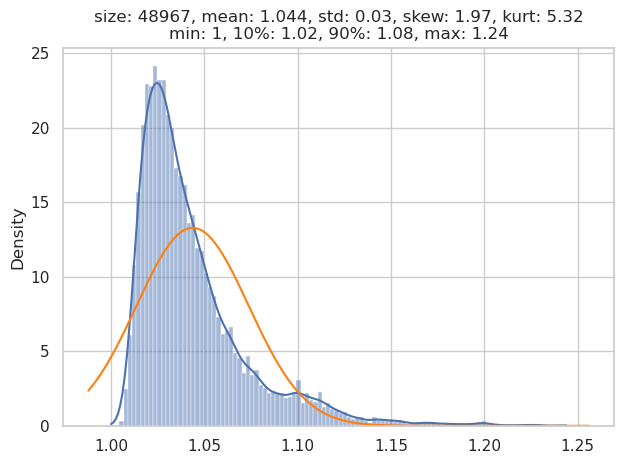

<Axes: title={'center': 'size: 48967, mean: 1.044, std: 0.03, skew: 1.97, kurt: 5.32\nmin: 1, 10%: 1.02, 90%: 1.08, max: 1.24'}, ylabel='Density'>

In [22]:
plot_kde(evaluation_f.tail(10))